# The Goal of Project

the goal of project is predicting Purchasing Intent

# Filter-based method

In [160]:
%pip install pandas
%pip install scikit-learn
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [161]:
# Loaded variable 'df' from URI: /Users/huypham/ASM3-PDS-2789/online_shoppers_intention.csv
import pandas as pd
data = pd.read_csv(r'/Users/huypham/ASM3-PDS-2789/online_shoppers_intention.csv')

In [162]:
print(data)

       Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0               2                64.000000 

# Check unique value

In [163]:
categorical_columns = ['Month', 'VisitorType', 'Weekend', 'Revenue']

for column in categorical_columns:
    print(f"{column}: {data[column].value_counts()}")
    print("")

Month: Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64

VisitorType: VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64

Weekend: Weekend
False    9462
True     2868
Name: count, dtype: int64

Revenue: Revenue
False    10422
True      1908
Name: count, dtype: int64



# Apply oridinal encoding

In [164]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

categorical_columns = ['Month', 'VisitorType', 'Weekend', 'Revenue']
data_encoded = ordinal_encoder.fit_transform(data[categorical_columns])
X_encoded = pd.DataFrame(data_encoded, columns=categorical_columns)
X_encoded.head()

,Month,VisitorType,Weekend,Revenue
0,2.0,2.0,0.0,0.0
1,2.0,2.0,0.0,0.0
2,2.0,2.0,0.0,0.0
3,2.0,2.0,0.0,0.0
4,2.0,2.0,1.0,0.0


## Apply scaling

In [165]:
from sklearn.preprocessing import RobustScaler

numerical_columns = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
scaler = RobustScaler()

data_scaled = scaler.fit_transform(data[numerical_columns])
X_scaled = pd.DataFrame(data_scaled, columns=numerical_columns)
data_scaled_encoded = pd.concat([X_scaled, X_encoded], axis=1)
data_scaled_encoded.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,VisitorType,Weekend,Revenue
0,-0.25,-0.080424,0.0,0.0,-0.548387,-0.467912,11.710742,4.895621,0.0,0.0,2.0,2.0,0.0,0.0
1,-0.25,-0.080424,0.0,0.0,-0.516129,-0.417913,-0.185128,2.095621,0.0,0.0,2.0,2.0,0.0,0.0
2,-0.25,-0.080424,0.0,0.0,-0.548387,-0.467912,11.710742,4.895621,0.0,0.0,2.0,2.0,0.0,0.0
3,-0.25,-0.080424,0.0,0.0,-0.516129,-0.465829,2.788840,3.215621,0.0,0.0,2.0,2.0,0.0,0.0
4,-0.25,-0.080424,0.0,0.0,-0.258065,0.022315,1.004459,0.695621,0.0,0.0,2.0,2.0,1.0,0.0


Prepare the data by separating the features matrix (X) and the target vector (y).

In [166]:
# Dropping 'Revenue' column to create X
X = data_scaled_encoded.drop(columns=['Revenue'])

# Adding multiple columns to X
columns_to_add = ['OperatingSystems', 'Browser', 'Region', 'TrafficType']
X[columns_to_add] = data[columns_to_add]

print(X)

       Administrative  Administrative_Duration  Informational  \
0               -0.25                -0.080424            0.0   
1               -0.25                -0.080424            0.0   
2               -0.25                -0.080424            0.0   
3               -0.25                -0.080424            0.0   
4               -0.25                -0.080424            0.0   
...               ...                      ...            ...   
12325            0.50                 1.474432            0.0   
12326           -0.25                -0.080424            0.0   
12327           -0.25                -0.080424            0.0   
12328            0.75                 0.723812            0.0   
12329           -0.25                -0.080424            0.0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0       -0.548387                -0.467912   
1                         0.0       -0.516129                -0.417913 

In [167]:
y = data_scaled_encoded['Revenue']

print(y)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
12325    0.0
12326    0.0
12327    0.0
12328    0.0
12329    0.0
Name: Revenue, Length: 12330, dtype: float64


# Variance threshold

### why using that? 
- because this is the most basic filter methods is to use a variance threshold to remove any features that have little to no variation in their values.

In [168]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0)  # 0 is default

print(selector.fit_transform(X))

[[-0.25       -0.08042356  0.         ...  1.          1.
   1.        ]
 [-0.25       -0.08042356  0.         ...  2.          1.
   2.        ]
 [-0.25       -0.08042356  0.         ...  1.          9.
   3.        ]
 ...
 [-0.25       -0.08042356  0.         ...  2.          1.
  13.        ]
 [ 0.75        0.72381208  0.         ...  2.          3.
  11.        ]
 [-0.25       -0.08042356  0.         ...  2.          1.
   2.        ]]


In [169]:
# to see what columns are kept and what are removed
num_cols = list(X.columns[selector.get_support(indices=True)])

print(num_cols)

['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'VisitorType', 'Weekend', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']


In [170]:
X_num = X[num_cols]

print(X_num)

       Administrative  Administrative_Duration  Informational  \
0               -0.25                -0.080424            0.0   
1               -0.25                -0.080424            0.0   
2               -0.25                -0.080424            0.0   
3               -0.25                -0.080424            0.0   
4               -0.25                -0.080424            0.0   
...               ...                      ...            ...   
12325            0.50                 1.474432            0.0   
12326           -0.25                -0.080424            0.0   
12327           -0.25                -0.080424            0.0   
12328            0.75                 0.723812            0.0   
12329           -0.25                -0.080424            0.0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0       -0.548387                -0.467912   
1                         0.0       -0.516129                -0.417913 

As we can see that the OperatingSystems,Browser,Region and TrafficType was removed because it is no variation in its values. Additionally, these attributes are not provided any useful predictive information about the revenue.

# Pearson’s correlation

### This method will use for numeric value. It measure the linear relationship between continuous features and a continuous or binary target(the revenue with 0 for false and 1 for true)

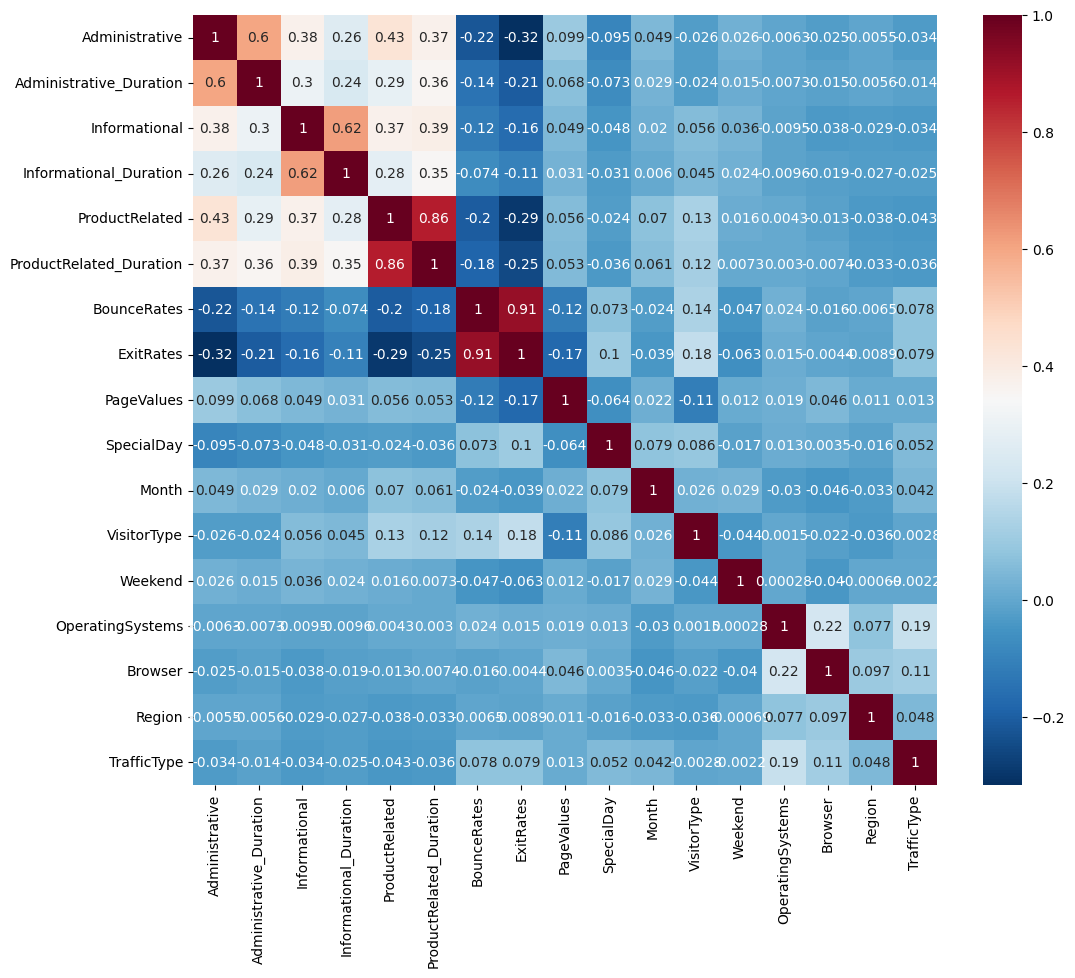

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = X_num.corr(method='pearson')  # 'pearson' is default

# Set the figure size to make the heatmap larger
plt.figure(figsize=(12, 10))  # Adjust the size as needed (width, height)

sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r')
plt.show()


In [172]:
# Loop over bottom diagonal of correlation matrix
for i in range(len(corr_matrix.columns)):
    for j in range(i):

        # Print variables with high correlation
        if abs(corr_matrix.iloc[i, j]) > 0.6:
            print(corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j])
            print(f'{corr_matrix.columns[i]}, "revenue" - {data_scaled_encoded[corr_matrix.columns[i]].corr(data_scaled_encoded['Revenue'])} ')
            print(f'{corr_matrix.columns[j]}, "revenue" - {data_scaled_encoded[corr_matrix.columns[j]].corr(data_scaled_encoded['Revenue'])} ')

            print("-----------------")

Administrative_Duration Administrative 0.6015833421250216
Administrative_Duration, "revenue" - 0.09358671905704179 
Administrative, "revenue" - 0.13891709415067224 
-----------------
Informational_Duration Informational 0.6189548617814573
Informational_Duration, "revenue" - 0.07034450234598336 
Informational, "revenue" - 0.09520034257205744 
-----------------
ProductRelated_Duration ProductRelated 0.8609268361763696
ProductRelated_Duration, "revenue" - 0.1523726105570103 
ProductRelated, "revenue" - 0.15853798428087465 
-----------------
ExitRates BounceRates 0.9130043961815196
ExitRates, "revenue" - -0.2070710820552716 
BounceRates, "revenue" - -0.15067291192605378 
-----------------


### The output of Administrative_Duration Administrative 0.6015833421250216
- As we can see both appear to be highly positively correlated - a visitor who has a total number of interactions with administrative pages(Login or signup pages, Account settings,Contact or support pages) tends to spend more time interacting with them. So, it shows the redundant information, we can choose to remove one of those variables. To decide which one, we can look at their correlation with the target variable, then remove the one that is less associated with the target.

### The output of Informational_Duration Informational 0.6189548617814573
- As we can see both appear to be highly positively correlated - a visitor who has a total number of interactions with nformational pages (About Us page, Blog articles or guides, Educational content or FAQs, Company news or press releases) tends to spend more time interacting with them. So, it shows the redundant information, we can choose to remove one of those variables. To decide which one, we can look at their correlation with the target variable, then remove the one that is less associated with the target.

### The output of ProductRelated_Duration ProductRelated is 0.8609268361763696
- As we can see both appear to be highly positively correlated - a visitor who has a total number of interactions with product pages tends to spend more time interacting with them. So, it shows the redundant information, we can choose to remove one of those variables. To decide which one, we can look at their correlation with the target variable, then remove the one that is less associated with the target.

### The output of ExitRates BounceRates is 0.9130043961815196
-  As we can see that both appear to be highly positively correlated which based on the user intent (the user may come to the page with a specific purpose, complete it (or decide it’s not worth pursuing), and then leave without engaging further) or pages that are landing pages or have single-purpose designs often result in both high bounce and exit rates (Blog articles or informational pages). Because both provide the redundant information so we need to remove one and what we will choose to remove?

## Correlation between feature and target

### Based on that we choose :
- Administrative
- Informational
- ProductRelated
- ExitRates

# Mutual information

In [173]:
X_mutual = X_num.drop(columns=['Administrative_Duration','Informational_Duration','ProductRelated_Duration','ExitRates'])
print(X_mutual)

       Administrative  Informational  ProductRelated  BounceRates  PageValues  \
0               -0.25            0.0       -0.548387    11.710742    0.000000   
1               -0.25            0.0       -0.516129    -0.185128    0.000000   
2               -0.25            0.0       -0.548387    11.710742    0.000000   
3               -0.25            0.0       -0.516129     2.788840    0.000000   
4               -0.25            0.0       -0.258065     1.004459    0.000000   
...               ...            ...             ...          ...         ...   
12325            0.50            0.0        1.129032     0.239725   12.241717   
12326           -0.25            0.0       -0.419355    -0.185128    0.000000   
12327           -0.25            0.0       -0.387097     4.771485    0.000000   
12328            0.75            0.0       -0.096774    -0.185128    0.000000   
12329           -0.25            0.0       -0.483871    -0.185128    0.000000   

       SpecialDay  Month  V

In [174]:
print(y)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
12325    0.0
12326    0.0
12327    0.0
12328    0.0
12329    0.0
Name: Revenue, Length: 12330, dtype: float64


In [175]:
from sklearn.feature_selection import mutual_info_classif

print(mutual_info_classif(X_mutual, y, random_state=68))


[0.02282808 0.0059423  0.02447742 0.0210603  0.16223111 0.00595812
 0.01310351 0.00904944 0.         0.00070583 0.         0.
 0.01521716]


#### Because we had a discrete target variable, we would use mutual_info_classif().

In [176]:
print(mutual_info_regression(X_mutual, y, discrete_features=[0], random_state=68))

[0.01789    0.00250674 0.01227348 0.01975687 0.17941477 0.
 0.01470898 0.         0.01201126 0.00376674 0.         0.00833405
 0.00668943]


In [177]:
from sklearn.feature_selection import SelectKBest
from functools import partial

score_func = partial(mutual_info_regression, discrete_features=[0], random_state=68)

# Select top 3 features with the most mutual information
selection = SelectKBest(score_func=score_func, k=6)

print(selection.fit_transform(X_mutual, y))

[[-0.25       -0.5483871  11.71074185  0.          2.          0.        ]
 [-0.25       -0.51612903 -0.18512753  0.          2.          0.        ]
 [-0.25       -0.5483871  11.71074185  0.          2.          0.        ]
 ...
 [-0.25       -0.38709677  4.77148469  0.          7.          1.        ]
 [ 0.75       -0.09677419 -0.18512753  0.          7.          0.        ]
 [-0.25       -0.48387097 -0.18512753  0.          7.          1.        ]]


In [178]:
X_mutual= X_mutual[X_mutual.columns[selection.get_support(indices=True)]]

print(X_mutual)

       Administrative  ProductRelated  BounceRates  PageValues  Month  Weekend
0               -0.25       -0.548387    11.710742    0.000000    2.0      0.0
1               -0.25       -0.516129    -0.185128    0.000000    2.0      0.0
2               -0.25       -0.548387    11.710742    0.000000    2.0      0.0
3               -0.25       -0.516129     2.788840    0.000000    2.0      0.0
4               -0.25       -0.258065     1.004459    0.000000    2.0      1.0
...               ...             ...          ...         ...    ...      ...
12325            0.50        1.129032     0.239725   12.241717    1.0      1.0
12326           -0.25       -0.419355    -0.185128    0.000000    7.0      1.0
12327           -0.25       -0.387097     4.771485    0.000000    7.0      1.0
12328            0.75       -0.096774    -0.185128    0.000000    7.0      0.0
12329           -0.25       -0.483871    -0.185128    0.000000    7.0      1.0

[12330 rows x 6 columns]


# 6 columns are: Administrative - ProductRelated - BounceRates - PageValues - Month - Weekend